# Compare galaxy power spectrum models in observed coordinates

Instead of using comoving wavenumbers ($k_\perp$,$k_\parallel$), in 1/Mpc, we use dimensionless
wavenumbers, corresponding to radians and dv/c = log(1+z):

$q_\perp = k_\perp D_A(z) (1+z) \hspace{20pt} q_\parallel = k_\parallel D_H(z) (1+z) \hspace{10pt}$

with $\hspace{10pt} D_H(z) = \frac{c}{H(z)}$.

In [1]:
%matplotlib inline
import numpy as np
import os
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from sigmaX import cosmology
from sigmaX import galaxy_power
from sigmaX import galaxy_survey

### Setup cosmology dictionaries, with everything we might want to use later on

In [2]:
cosmo_true=cosmology.get_cosmo(z=0.02,b=2.0)
cosmology.print_cosmo_info(cosmo_true)

f = 0.5456054001560122
sig8 = [0.79439401]
sig12 = [0.79167321]
DA = 87.31755529174495
DH = 4431.799203422664


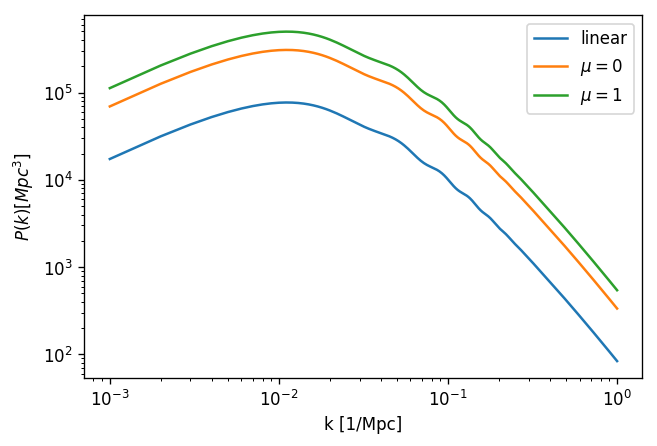

In [3]:
# plot model of galaxy power spectrum in comoving coordinates [Mpc]
galaxy_power.plot_galP_Mpc(cosmo_true)

### Setup survey geometry and observed coordinates

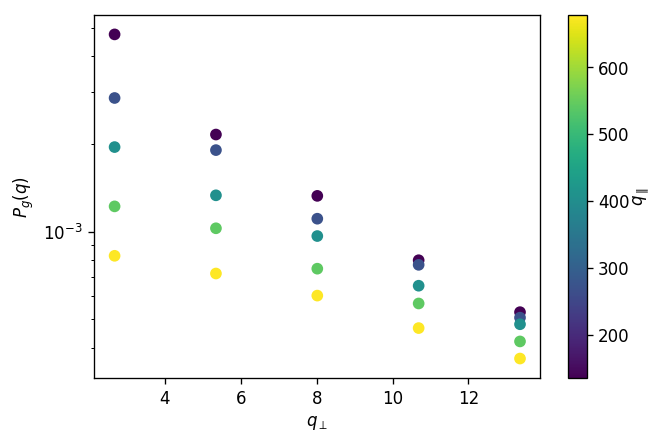

In [4]:
survey=galaxy_survey.get_survey(cosmo_true)
qt=survey['qt']
qp=survey['qp']
galaxy_power.plot_galP_obs(qt,qp,cosmo_true,cosmo_true)

### Make predictions with the wrong cosmology

In [5]:
# we will use the wrong reference cosmology (different h and Omega_m)
cosmo_ref=cosmology.get_cosmo(cosmo_true['z'],H0=50)

In [6]:
cosmology.print_cosmo_info(cosmo_ref)

f = 0.7447070068827061
sig8 = [0.72851928]
sig12 = [0.89586132]
DA = 116.56741497240378
DH = 5894.224842564569


In [7]:
cosmology.print_cosmo_info(cosmo_true)

f = 0.5456054001560122
sig8 = [0.79439401]
sig12 = [0.79167321]
DA = 87.31755529174495
DH = 4431.799203422664


### Make predictions for different models

In [8]:
def plot_residuals(qt,qp,cosmo_coord=None,cosmo_temp=None,params={}):
    # compute true power in observed coordinates
    galP_obs=galaxy_power.get_galP_obs(qt,qp,cosmo_coord=cosmo_true,cosmo_temp=cosmo_true)
    galP_ref=galaxy_power.get_galP_obs(qt,qp,cosmo_coord=cosmo_coord,cosmo_temp=cosmo_temp,params=params)
    plt.scatter(qt,galP_obs/galP_ref,c=qp)
    cbar=plt.colorbar()
    cbar.set_label(r'$q_\parallel$', labelpad=+1)        
    plt.xlabel(r'$q_\perp$')
    plt.ylabel(r'$P_g/P_{\rm g, ref}(q)$')

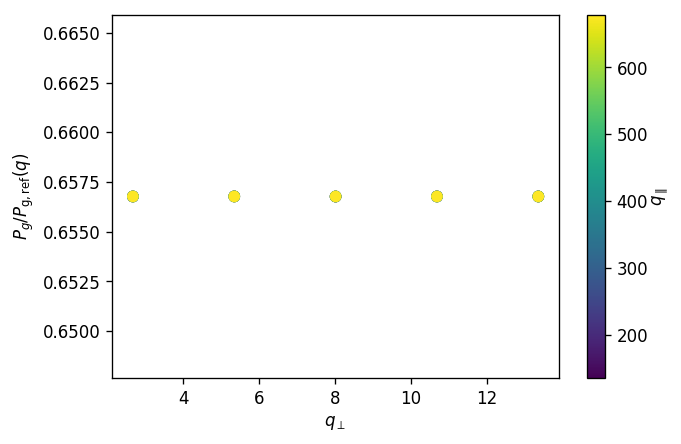

In [9]:
# make prediction for galaxy power spectrum using reference model
#params={'bsig8':1.3,'fsig8':0.5,'at':1.05,'ap':0.95}
bsig8_true=cosmo_true['b']*cosmo_true['sig8']
fsig8_true=cosmo_true['f']*cosmo_true['sig8']
at_true=cosmo_true['DA']/cosmo_ref['DA']
ap_true=cosmo_true['DH']/cosmo_ref['DH']
plot_residuals(qt,qp,cosmo_coord=cosmo_ref,cosmo_temp=cosmo_ref,
               params={'bsig8':bsig8_true,'fsig8':fsig8_true,'at':at_true,'ap':ap_true})

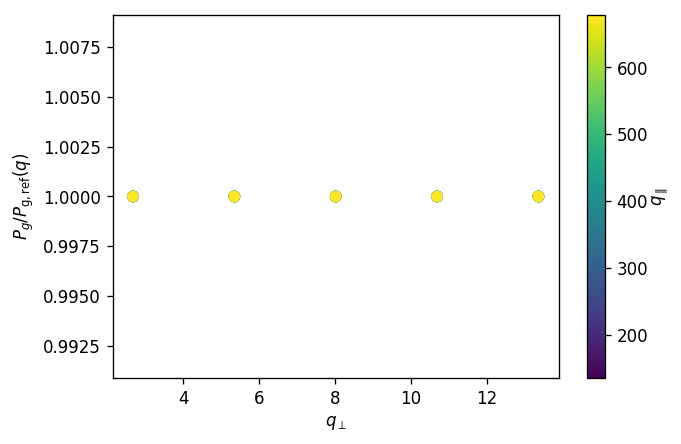

In [10]:
# make prediction for galaxy power spectrum using reference model
#params={'bsig8':1.3,'fsig8':0.5,'at':1.05,'ap':0.95}
bsig8_true=cosmo_true['b']*cosmo_true['sig8']
fsig8_true=cosmo_true['f']*cosmo_true['sig8']
at_true=cosmo_true['DA']/cosmo_ref['DA']
ap_true=cosmo_true['DH']/cosmo_ref['DH']
plot_residuals(qt,qp,cosmo_coord=cosmo_ref,cosmo_temp=cosmo_true,
              params={'at':at_true,'ap':ap_true})